1.1 install dependencies and setup

In [1]:
import tensorflow as tf 
import os # use it for return file structure

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
len(gpus)

0

In [3]:
# avoid OOM errors by setting GPU Memory consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU') # give us all the gpu we have in computere
#for each gpu inside of the gpus
for gpu in  gpus:
    tf.config.experimental.set_memory_growth(gpu, True) # telling tensorflow not to use all of the memory just use in minimum or use it whatever it needs

1.2 remove dodgy images

In [4]:
import cv2 # open computer vison
import imghdr # allow us to  check file extension

data_dir = "data" # dir to the folder name "data"
image_exts = ['jpep', 'jpg', 'bmp', 'png']   
'''
os.listdir(data_dir)# print the folder name in the big folder
# and if we want to  loop through each image in the folder example folder happy
os.listdir(os.path.join(data_dir, 'happy')) # so it will return all the imgae in the folder 

'''

C:\Users\M\AppData\Local\Temp\ipykernel_4908\19920890.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr # allow us to  check file extension


"\nos.listdir(data_dir)# print the folder name in the big folder\n# and if we want to  loop through each image in the folder example folder happy\nos.listdir(os.path.join(data_dir, 'happy')) # so it will return all the imgae in the folder \n\n"

In [5]:
image_exts[0] 

'jpep'

In [6]:
# check how loop is working
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

05-12-21-happy-people.jpg
07-120104-happy_people_are_not_nice_people.jpg
1-2.jpg
1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
11-Habits-of-Truly-Happy-People.jpg
154006829.jpg
170404-happy-workers-feature.jpg
1902539.jpg
1902540.jpg
1902587.jpg
1920px-face-smile.svg_.png.jpg
1HEoLBLidT2u4mhJ0oiDgig.png
227-2271622_happy-people-business-team-celebrating-png.png
7-Habits-of-Happy-People-image.jpeg
7-principles-of-successful-and-happy-people.png
7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
8cxKy5g9i.jpg
960x0.jpg
A_Sep20_14_1189155141.jpg
bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg
blog_image_20180219221810890.jpg
brady-bunch-3.jpg
e162ccda8ce0f197f8863f327add9233.jpg
fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg
friends-happy-190821-800x450.jpg
GettyImages-565706549-949x534.jpg
GettyImages-871518740-1024x707.jpg
getty_152414899_97046097045006_68075.jpg
getty_478389113_970647970450091_99776.jpg
getty_494581822_130796.jpg
ge

In [7]:
from matplotlib import pyplot as plt
img = cv2.imread(os.path.join('data', 'happy', '1902539.JPG'))

img.shape# (if only use thiss it will diplay, (rows of pixel, columns of pixel, number of color(would be 3)))

(1200, 1920, 3)

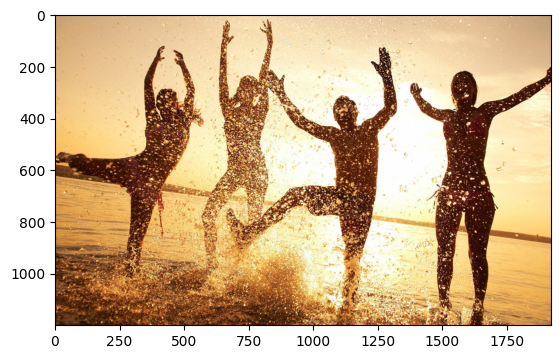

In [8]:
plt.imshow(img) # this only show in3 color of picture
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#to delete that words : <matplotlib.image.AxesImage at 0x26be119a960>
plt.show()

In [9]:
 # loop through the folder data which have happy and sad two classes
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)): # loop through every image
        image_path = os.path.join(data_dir, image_class, image)# store all image in this image path
        try: 
            image = cv2.imread(image_exts) # open up the image through CV more example above
            tip = imghdr(image_path) # valid extension
            if tip not in image_exts:
                print('image not in ext list {}'.format(image_path))
                os.remove(image_path) # remove the file
        except Exception as e:
            print('Issue with image {}'.format(image_path))

Issue with image data\happy\05-12-21-happy-people.jpg
Issue with image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with image data\happy\1-2.jpg
Issue with image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with image data\happy\154006829.jpg
Issue with image data\happy\170404-happy-workers-feature.jpg
Issue with image data\happy\1902539.jpg
Issue with image data\happy\1902540.jpg
Issue with image data\happy\1902587.jpg
Issue with image data\happy\1920px-face-smile.svg_.png.jpg
Issue with image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with image data\happy\7-principles-of-successful-and-happy-people.png
Issue with image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg
Issue with image data\happy\8cxKy5g9i.jpg
Issue w

1.3 Load data

In [ ]:
# dataset API
tf.data.Dataset.list_files # for that question mark we can replace it by .list_files which directly use
# list_files will return a dataset of file paths
# we can use tf.data.Dataset?? in jupyter notebook to see the code

<function tensorflow.python.data.ops.dataset_ops.DatasetV2.list_files(file_pattern, shuffle=None, seed=None, name=None) -> 'DatasetV2'>

In [15]:
import numpy as np
from matplotlib import pyplot as plt # image visualization

In [48]:
# build data set for us on the fly, so we dont need to build the labels, 
# classes, it did for us and it do the bunch of pre-processing out of the box0,
#  and it also resize our image also, example below
# in easy word is building our data pipline
data = tf.keras.utils.image_dataset_from_directory('data')


Found 171 files belonging to 2 classes.


In [49]:
tf.keras.utils.image_dataset_from_directory?? 

SyntaxError: invalid syntax (502732113.py, line 1)

In [50]:
# after that run that code above the data (image) is already pr-loaded into memory
# so we need too grab the data that we want on the fly 
# that is why we now cant directly use to print the data, so it need a generator below
# this convert it into a numpy iterator through loop
# in easy word is allowing to access our data pipline
data_iterator = data.as_numpy_iterator()

In [51]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x0000028284497B90>)

In [52]:
# grab into 1 batch
# accessing data pipeline
#Get another batch from the interator
batch = data_iterator.next()

In [53]:
batch

(array([[[[1.37000000e+02, 1.67000000e+02, 1.93000000e+02],
          [1.37000000e+02, 1.67000000e+02, 1.93000000e+02],
          [1.37000000e+02, 1.67000000e+02, 1.93000000e+02],
          ...,
          [1.14250977e+02, 6.89169922e+01, 3.93339844e+01],
          [1.25000000e+02, 7.55000000e+01, 4.15000000e+01],
          [1.36333984e+02, 8.33339844e+01, 4.23339844e+01]],
 
         [[1.37498047e+02, 1.67498047e+02, 1.93498047e+02],
          [1.37498047e+02, 1.67498047e+02, 1.93498047e+02],
          [1.37498047e+02, 1.67498047e+02, 1.93498047e+02],
          ...,
          [1.09250977e+02, 6.67509766e+01, 3.92509766e+01],
          [1.24501953e+02, 7.50019531e+01, 4.10019531e+01],
          [1.34500000e+02, 8.15000000e+01, 4.05000000e+01]],
 
         [[1.38000000e+02, 1.68000000e+02, 1.94000000e+02],
          [1.38000000e+02, 1.68000000e+02, 1.94000000e+02],
          [1.38000000e+02, 1.68000000e+02, 1.94000000e+02],
          ...,
          [1.02169922e+02, 6.35000000e+01, 3.7500

In [54]:
len(batch) # there is part of this data set which are images and lables 

2

In [55]:
# so if we want to see the the shape of the image that we generate
# images represent as numpy
batch[0].shape
# 32 batch is re-shape for this image, in order to ensure they are consistent size

(32, 256, 256, 3)

so if we want to configue or change the bath size or image size into the number we want we can do below before these few lines of code

In [56]:
#tf.keras.utils.image_dataset_from_directory('data', batch_size=8, image_size=(128, 128))

In [57]:
# labels
batch[1]
#class 1 = sad people
# class 0 = happy people
# 1 or 0 either represent happer or sad

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int32)

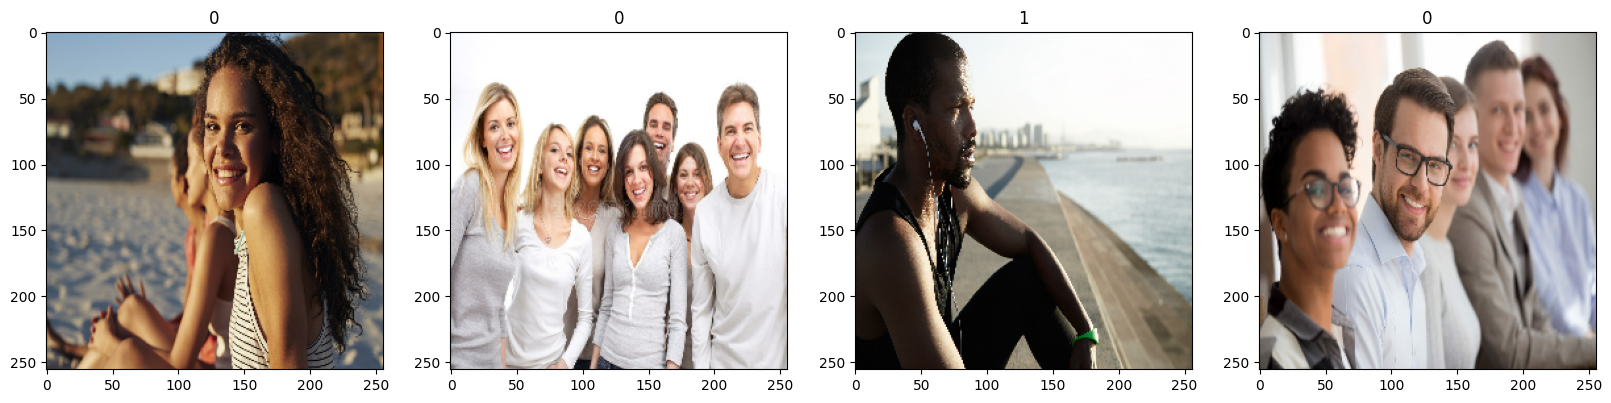

In [58]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) # subplots plot four image in the same time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

batch[0] is image, while batch[1] is label

so here 1 represent sad and 0 represent happy

In [30]:
batch[0].min()

np.float32(0.0)

In [31]:
batch[0].max()

np.float32(255.0)

the value of each image is from 0 to 255 which is a huge number
so in deep learing we want to have the smalleest value as possible, so it make the process faster 
so what we need to do is to divide the 255 all the time 

In [32]:
scaled = batch[0] / 255 # this will give us the number between 0 and one 

In [33]:
scaled.max() # so it successfully scale the data

np.float32(1.0)

as we use the data pipeline, we cant do this way every single time we load up a batch, instead using data pipeline

2. Pre- processing

pre-processing for image data we tend to pre-process by scaling the image value to between 0 and 1 
instead of 0 to 255, this helps our deep learning model generalize faster and produces better results.
Moreover, we going to split up our data into training and testing and validation partitions to ensure that we dont overfit

2.1 Scale data

for map function is allow us to apply a particular tranformation in pipeline, it is when we are going to pre-fretch, it transformation and speed it up than how we access our data from our disk.

In [59]:
# scale data(image) by 255
data = data.map(lambda x, y: (x/255, y)) # x is our image, y which is our variable (label)
# this will scale all the image in the data set into 0 and 1

crucially,there are many of transformation function for tensorflow data set pipeline, not only map function 

In [63]:
scaled_iterator = data.as_numpy_iterator()  

In [64]:
batch = scaled_iterator.next()

In [65]:
batch[0].max() # so it successfully scale the data

np.float32(1.0)

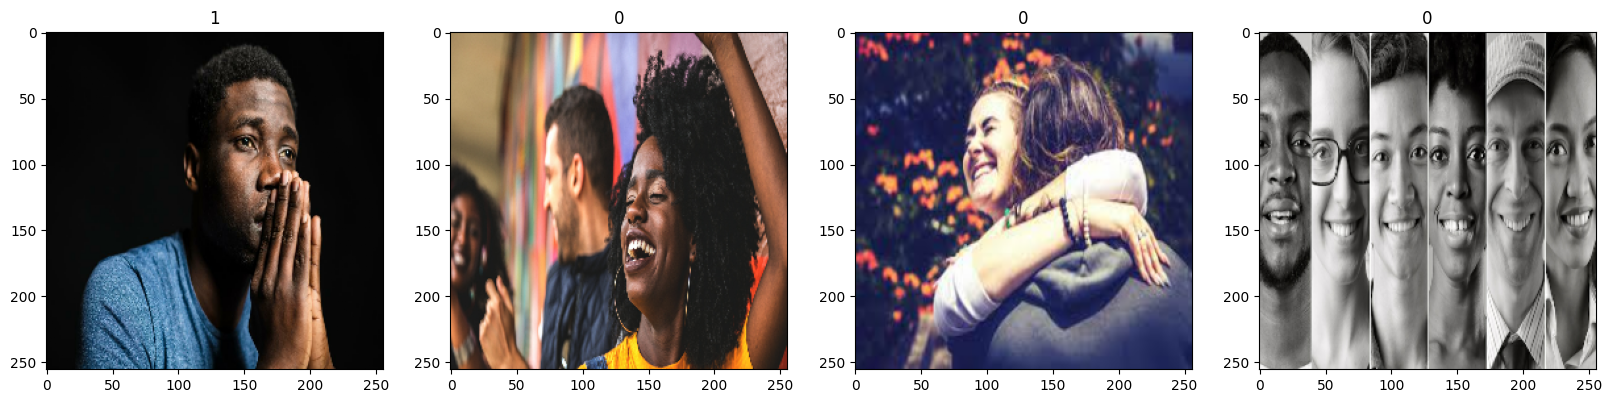

In [66]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20)) # subplots plot four image in the same time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data


In [ ]:
len(data) # 32 batch size, 6 * 32 = 192 images

6

In [ ]:
train_data = int(len(data) * 0.7) # 70% of the data, train our data deep learning model
val_data = int(len(data) * 0.15) + 1# 15% of the data, evaluate our model, while we are training (validation)
test_data = int(len(data) * 0.15) + 1# 15% of the data, test our model, after we are done training

In [71]:
train_data, val_data, test_data

(4, 1, 1)

however, we can just use building function to automatically select how many percent that we need
to take by using "take" and "skip"

In [74]:
train = data.take(train_data) # take the first 70% of the data
val = data.skip(train_data).take(val_data) # skip the first 70% of the data, and take the next 15% of the data  
test = data.skip(train_data + val_data) # skip the first 70% and 15% of the data, and take the rest of the data

In [76]:
len(train), len(val), len(test)

(4, 1, 1)